In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import torchvision.transforms
import torchvision
import numpy as np

In [3]:
trainset = torchvision.datasets.CIFAR10('./dataset',True,torchvision.transforms.ToTensor(),download = True)

Extracting ./dataset\cifar-10-python.tar.gz to ./dataset


In [4]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [35]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size =8,shuffle = True)

In [36]:
dataiter = iter(trainloader)
images , labels = dataiter.next()

print(images.shape)
print(images.shape)
print(labels)

torch.Size([8, 3, 32, 32])
torch.Size([8, 3, 32, 32])
tensor([5, 5, 8, 7, 8, 7, 9, 8])


# Visualise Data

In [21]:
img = images[4]
print(type(img))

<class 'torch.Tensor'>


In [22]:
npimg=img.numpy()
print(npimg.shape)
print(type(npimg))

(3, 32, 32)
<class 'numpy.ndarray'>


In [23]:
npimg = np.transpose(npimg,(1,2,0))  #Changing axes for our usage
print(npimg.shape)

(32, 32, 3)


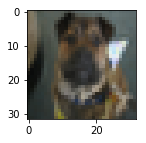

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(npimg)
plt.show()

In [33]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.transpose(npimg,(1,2,0))
    plt.figure(figsize=(20,20))
    plt.imshow(npimg)
    plt.show()

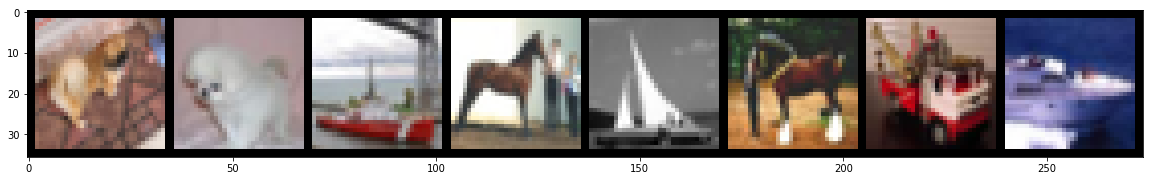

dog dog ship horse ship horse truck ship


In [37]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(8)))

# Single Convolution Layer

In [38]:
import torch.nn as nn

In [51]:
class FirstCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=(1,1),stride=(1,1))
        
    def forward(self,x):
        return self.conv1(x)

In [52]:
net = FirstCNN()

In [53]:
out = net(images)
out.shape

torch.Size([8, 16, 32, 32])

In [54]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [55]:
out1 = out[0,0,:,:]
out1.shape

torch.Size([32, 32])

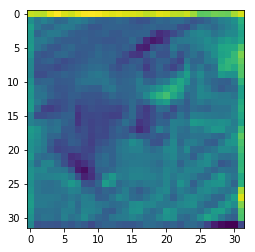

In [56]:
plt.imshow(out1.detach().numpy())
plt.show()

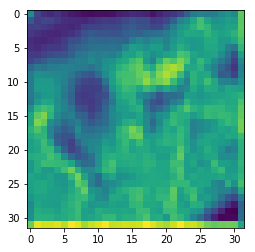

In [64]:
plt.imshow(out[0,14,:,:].detach().numpy())
plt.show()

# Deep CNN

In [69]:
class deepCNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(3,50,5),nn.Conv2d(50,64,3))
        
    def forward(self,x):
        return self.model(x)

In [70]:
net = deepCNN()
out = net(images)
out.shape

torch.Size([8, 64, 26, 26])

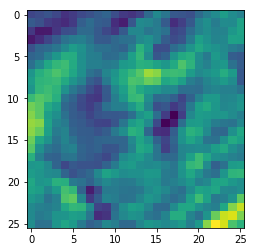

In [73]:
plt.imshow(out[0,0,:,:].detach().numpy())

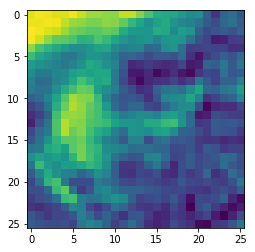

In [74]:
plt.imshow(out[0,60,:,:].detach().numpy())

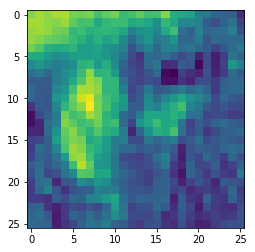

In [75]:
plt.imshow(out[0,20,:,:].detach().numpy())

In [91]:
class CNNfull(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,16,3), #(N,3,32,32) -> (N,16,30,30)
            nn.AvgPool2d(3,stride = 3), #(N,16,30,30) -> (N,16,10,10)
            nn.Conv2d(16,32,3), #(N,16,10,10) -> (N,32,8,8)
            nn.AvgPool2d(2,stride=2) #(N,32,8,8) -> (N,32,4,4)
        )
        
    def forward(self,X):
        return self.model(X)

In [92]:
net = CNNfull()
out = net(images)
out.shape

torch.Size([8, 32, 4, 4])

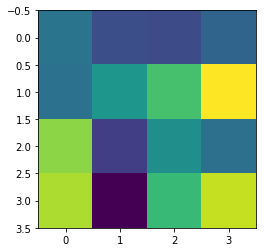

In [94]:
plt.imshow(out[0,0,:,:].detach().numpy())

# CIFAR10 full class

In [115]:
class CIFAR10(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,16,3),nn.Tanh(),nn.AvgPool2d(3,3),
            nn.Conv2d(16,64,3),nn.Tanh(),nn.AvgPool2d(2,2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(1024,64),nn.Tanh(),
            nn.Linear(64,32),nn.Tanh(),
            nn.Linear(32,10),nn.Softmax()
        )
        
    def forward(self,x):
        print("Initial image_size",x.shape)
        x = self.cnn_model(x)
        print("After CNN layers",x.shape)
        y = torch.reshape(x,(8,-1,))
        x = x.view(x.size(0),-1)
        print("Flattening x",x.shape)
        print("Flattening y",y.shape)
        return self.fc_model(x),self.fc_model(y)

In [116]:
net = CIFAR10()
out,out_y = net(images)

Initial image_size torch.Size([8, 3, 32, 32])
After CNN layers torch.Size([8, 64, 4, 4])
Flattening x torch.Size([8, 1024])
Flattening y torch.Size([8, 1024])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [117]:
out.shape

torch.Size([8, 10])

In [118]:
out_y.shape

torch.Size([8, 10])

In [119]:
out

tensor([[0.0828, 0.1088, 0.1096, 0.1031, 0.0961, 0.1108, 0.1204, 0.0905, 0.0941,
         0.0837],
        [0.0810, 0.1082, 0.1079, 0.1044, 0.0963, 0.1097, 0.1206, 0.0912, 0.0967,
         0.0840],
        [0.0816, 0.1086, 0.1096, 0.1042, 0.0968, 0.1096, 0.1218, 0.0907, 0.0939,
         0.0832],
        [0.0820, 0.1081, 0.1082, 0.1033, 0.0956, 0.1107, 0.1200, 0.0915, 0.0963,
         0.0843],
        [0.0816, 0.1069, 0.1088, 0.1033, 0.0962, 0.1112, 0.1192, 0.0917, 0.0967,
         0.0844],
        [0.0841, 0.1079, 0.1088, 0.1012, 0.0959, 0.1111, 0.1190, 0.0908, 0.0963,
         0.0849],
        [0.0846, 0.1106, 0.1066, 0.1042, 0.0945, 0.1122, 0.1187, 0.0904, 0.0934,
         0.0848],
        [0.0823, 0.1060, 0.1101, 0.1020, 0.0973, 0.1109, 0.1173, 0.0912, 0.0977,
         0.0851]], grad_fn=<SoftmaxBackward>)

In [120]:
out_y

tensor([[0.0828, 0.1088, 0.1096, 0.1031, 0.0961, 0.1108, 0.1204, 0.0905, 0.0941,
         0.0837],
        [0.0810, 0.1082, 0.1079, 0.1044, 0.0963, 0.1097, 0.1206, 0.0912, 0.0967,
         0.0840],
        [0.0816, 0.1086, 0.1096, 0.1042, 0.0968, 0.1096, 0.1218, 0.0907, 0.0939,
         0.0832],
        [0.0820, 0.1081, 0.1082, 0.1033, 0.0956, 0.1107, 0.1200, 0.0915, 0.0963,
         0.0843],
        [0.0816, 0.1069, 0.1088, 0.1033, 0.0962, 0.1112, 0.1192, 0.0917, 0.0967,
         0.0844],
        [0.0841, 0.1079, 0.1088, 0.1012, 0.0959, 0.1111, 0.1190, 0.0908, 0.0963,
         0.0849],
        [0.0846, 0.1106, 0.1066, 0.1042, 0.0945, 0.1122, 0.1187, 0.0904, 0.0934,
         0.0848],
        [0.0823, 0.1060, 0.1101, 0.1020, 0.0973, 0.1109, 0.1173, 0.0912, 0.0977,
         0.0851]], grad_fn=<SoftmaxBackward>)

In [121]:
max_values,pred_class = torch.max(out,1)

In [122]:
pred_class

tensor([6, 6, 6, 6, 6, 6, 6, 6])

In [123]:
out.data

tensor([[0.0828, 0.1088, 0.1096, 0.1031, 0.0961, 0.1108, 0.1204, 0.0905, 0.0941,
         0.0837],
        [0.0810, 0.1082, 0.1079, 0.1044, 0.0963, 0.1097, 0.1206, 0.0912, 0.0967,
         0.0840],
        [0.0816, 0.1086, 0.1096, 0.1042, 0.0968, 0.1096, 0.1218, 0.0907, 0.0939,
         0.0832],
        [0.0820, 0.1081, 0.1082, 0.1033, 0.0956, 0.1107, 0.1200, 0.0915, 0.0963,
         0.0843],
        [0.0816, 0.1069, 0.1088, 0.1033, 0.0962, 0.1112, 0.1192, 0.0917, 0.0967,
         0.0844],
        [0.0841, 0.1079, 0.1088, 0.1012, 0.0959, 0.1111, 0.1190, 0.0908, 0.0963,
         0.0849],
        [0.0846, 0.1106, 0.1066, 0.1042, 0.0945, 0.1122, 0.1187, 0.0904, 0.0934,
         0.0848],
        [0.0823, 0.1060, 0.1101, 0.1020, 0.0973, 0.1109, 0.1173, 0.0912, 0.0977,
         0.0851]])

In [124]:
out

tensor([[0.0828, 0.1088, 0.1096, 0.1031, 0.0961, 0.1108, 0.1204, 0.0905, 0.0941,
         0.0837],
        [0.0810, 0.1082, 0.1079, 0.1044, 0.0963, 0.1097, 0.1206, 0.0912, 0.0967,
         0.0840],
        [0.0816, 0.1086, 0.1096, 0.1042, 0.0968, 0.1096, 0.1218, 0.0907, 0.0939,
         0.0832],
        [0.0820, 0.1081, 0.1082, 0.1033, 0.0956, 0.1107, 0.1200, 0.0915, 0.0963,
         0.0843],
        [0.0816, 0.1069, 0.1088, 0.1033, 0.0962, 0.1112, 0.1192, 0.0917, 0.0967,
         0.0844],
        [0.0841, 0.1079, 0.1088, 0.1012, 0.0959, 0.1111, 0.1190, 0.0908, 0.0963,
         0.0849],
        [0.0846, 0.1106, 0.1066, 0.1042, 0.0945, 0.1122, 0.1187, 0.0904, 0.0934,
         0.0848],
        [0.0823, 0.1060, 0.1101, 0.1020, 0.0973, 0.1109, 0.1173, 0.0912, 0.0977,
         0.0851]], grad_fn=<SoftmaxBackward>)

## Now training our CIFAR10 class

In [125]:
class CIFAR10_structured(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,16,3),nn.Tanh(),nn.AvgPool2d(3,3),
            nn.Conv2d(16,64,3),nn.Tanh(),nn.AvgPool2d(2,2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(1024,64),nn.Tanh(),
            nn.Linear(64,32),nn.Tanh(),
            nn.Linear(32,10),nn.Softmax()
        )
        
    def forward(self,x):
        x = self.cnn_model(x)
        x = x.view(x.size(0),-1)
        return self.fc_model(x)

In [128]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=True, transform=torchvision.transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=True, transform=torchvision.transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [143]:
def evaluation(dataloader):
    total,correct = 0,0
    for data in dataloader:
        inputs,labels = data
        outputs = net(inputs)
        _,pred_classes = torch.max(outputs.data,1)
        total += labels.size(0)
#         print(pred_classes.shape,labels.shape)
        correct += (pred_classes == labels).sum().item()
        return 100 * correct/total

In [130]:
net = CIFAR10_structured()

In [139]:
import torch.optim as optim
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [132]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Optimizer(net.parameters())

epoch: 0/16, Test_acc: 48.437500 , train_acc: 49.218750


epoch: 1/16, Test_acc: 44.531250 , train_acc: 47.656250


epoch: 2/16, Test_acc: 45.312500 , train_acc: 53.125000


epoch: 3/16, Test_acc: 46.093750 , train_acc: 53.906250


epoch: 4/16, Test_acc: 48.437500 , train_acc: 53.906250


epoch: 5/16, Test_acc: 51.562500 , train_acc: 52.343750


epoch: 6/16, Test_acc: 50.000000 , train_acc: 46.875000


epoch: 7/16, Test_acc: 54.687500 , train_acc: 44.531250


epoch: 8/16, Test_acc: 54.687500 , train_acc: 53.125000


epoch: 9/16, Test_acc: 52.343750 , train_acc: 58.593750


epoch: 10/16, Test_acc: 52.343750 , train_acc: 51.562500


epoch: 11/16, Test_acc: 57.031250 , train_acc: 60.156250


epoch: 12/16, Test_acc: 46.875000 , train_acc: 69.531250


epoch: 13/16, Test_acc: 51.562500 , train_acc: 56.250000


epoch: 14/16, Test_acc: 52.343750 , train_acc: 56.250000


epoch: 15/16, Test_acc: 57.031250 , train_acc: 62.500000


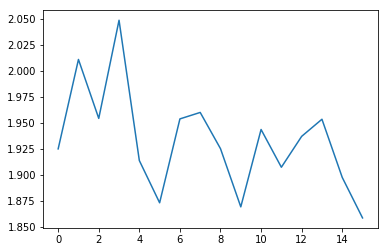

Wall time: 10min 53s


In [144]:
%%time
loss_arr =[]
loss_epoch_arr = []
max_epoch = 16

for epoch in tqdm_notebook(range(max_epoch),unit = 'epoch'):
    for i,data in tqdm_notebook(enumerate(trainloader,0),unit='data'):
        inputs,labels = data
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print('epoch: %d/%d, Test_acc: %f , train_acc: %f' %(epoch,max_epoch,evaluation(testloader),evaluation(trainloader)))
    
plt.plot(loss_epoch_arr)
plt.show()


# Basic visualisation

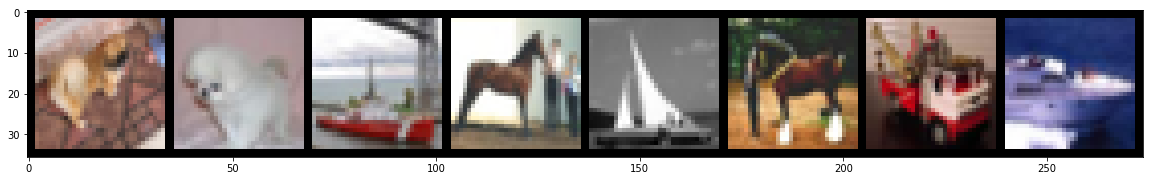

In [149]:
imshow(torchvision.utils.make_grid(images))

In [153]:
# imshow(torchvision.utils.make_grid(images))
out = net(images)

In [154]:
out.shape

torch.Size([8, 10])

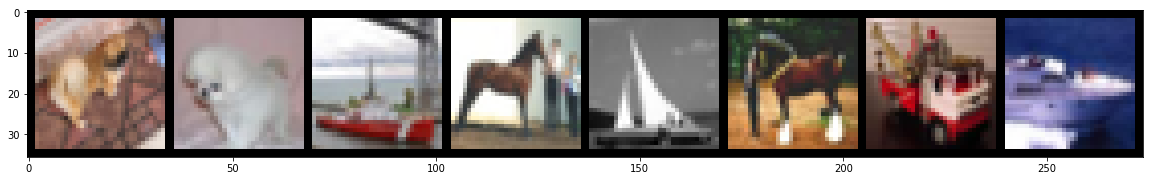

car cat car deer dog truck car plane


In [155]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(8)))

<Figure size 72x72 with 0 Axes>

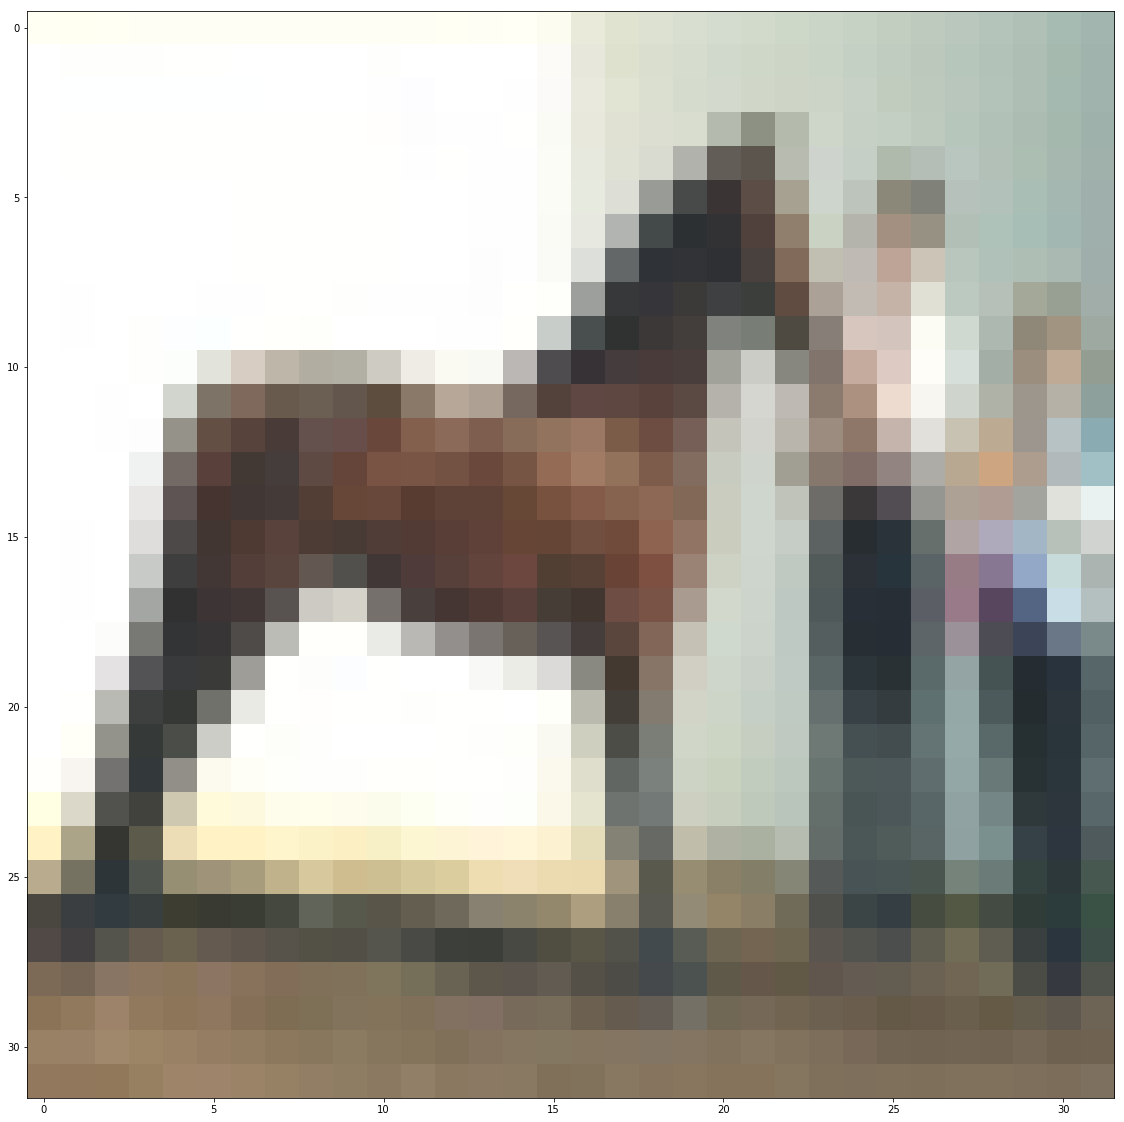

In [172]:
image_id = 3
plt.figure(figsize=(1,1))
imshow(images[image_id])
plt.show()

In [175]:
out1 = net.cnn_model[0](images)
out1.shape

torch.Size([8, 16, 30, 30])

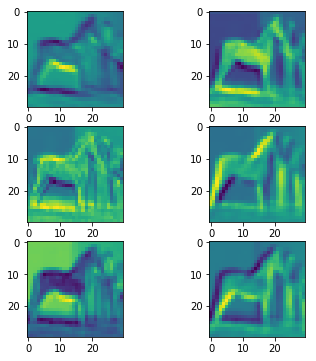

In [176]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
    ax1=plt.subplot(3,2,i+1)
    plt.imshow(out1[image_id,i,:,:].detach())
plt.show()

In [177]:
out

tensor([[4.2351e-07, 2.8552e-07, 5.4294e-08, 9.3895e-01, 4.1206e-08, 5.9346e-02,
         1.2576e-03, 3.3023e-04, 5.8472e-06, 1.1174e-04],
        [3.0041e-06, 2.1227e-06, 1.9404e-03, 9.7963e-01, 9.7159e-07, 1.7734e-02,
         4.6115e-04, 7.8501e-09, 2.3162e-04, 4.8635e-07],
        [6.3181e-02, 1.2316e-05, 5.9909e-01, 7.3109e-05, 1.8522e-04, 3.0752e-01,
         9.1831e-07, 1.5731e-03, 2.8367e-02, 3.4573e-08],
        [1.9381e-05, 8.2827e-08, 1.7862e-05, 1.3166e-03, 4.6281e-05, 1.7889e-05,
         9.2860e-09, 9.9762e-01, 5.8312e-05, 9.0028e-04],
        [2.3641e-07, 2.4063e-06, 1.5568e-02, 4.6568e-01, 2.8091e-05, 2.1514e-01,
         2.1002e-03, 1.7101e-07, 3.0148e-01, 2.4963e-06],
        [2.8141e-07, 8.4555e-10, 1.8301e-05, 1.5560e-05, 1.4802e-02, 1.7706e-04,
         1.5431e-07, 9.8499e-01, 1.7344e-09, 3.2233e-08],
        [4.2962e-08, 1.3968e-01, 1.9113e-10, 2.3665e-04, 2.7292e-06, 2.4984e-06,
         1.2401e-06, 1.6458e-06, 1.0258e-06, 8.6008e-01],
        [9.9777e-01, 8.2999

In [180]:
_,predict=torch.max(out.data,1)
predict

tensor([3, 3, 2, 7, 3, 7, 9, 0])

In [182]:
print("Original Labels",labels)
labels.shape

Original Labels tensor([1, 3, 1, 4, 5, 9, 1, 0, 4, 7, 3, 8, 8, 6, 9, 1, 8, 3, 6, 7, 8, 9, 3, 2,
        0, 7, 0, 0, 2, 1, 6, 2, 8, 0, 4, 1, 4, 0, 8, 1, 3, 6, 6, 9, 9, 9, 8, 7,
        9, 3, 5, 4, 7, 4, 3, 3, 3, 7, 0, 9, 5, 1, 5, 8, 8, 7, 0, 9, 3, 0, 0, 7,
        2, 1, 2, 7, 2, 3, 0, 3])


torch.Size([80])

In [183]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size =8,shuffle = True)

In [184]:
dataiter = iter(trainloader)
images , labels = dataiter.next()

print(images.shape)
print(images.shape)
print(labels)

torch.Size([8, 3, 32, 32])
torch.Size([8, 3, 32, 32])
tensor([8, 6, 8, 5, 9, 9, 5, 2])


In [185]:
out = net(images)
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.9916, 0.9882, 0.5251, 0.9996, 0.9918, 0.9960, 0.9872, 0.9694]),
indices=tensor([8, 6, 8, 5, 6, 9, 5, 2]))

In [187]:
print("random accuracy:",evaluation(trainloader))

random accuracy: 75.0


In [188]:
print("test accuracy:",evaluation(testloader))

test accuracy: 57.03125
